#### Summer of Science, Yasi's cohort

# Welcome to our Final Project Notebook!

We're going over how to open a FITS image again, but this time we'll figure out how to make a composite image in order to go from greyscale to RGB colour!

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.visualization import astropy_mpl_style
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits


### Here's how we opened our FITS image last time.

Filename: /home/jovyan/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


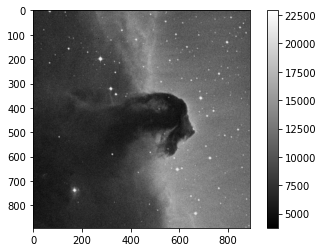

In [2]:
image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

### Here's how we'll do it today to combine our data from different bands.

[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

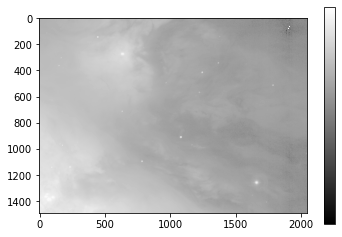

In [4]:
M42 = fits.open('frame-u-006073-4-0063.fits')
data = M42[0].data


plt.imshow(data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [5]:
M42u = fits.open('frame-u-006073-4-0063.fits')
M42i = fits.open('frame-i-006073-4-0063.fits')
M42g = fits.open('frame-g-006073-4-0063.fits')

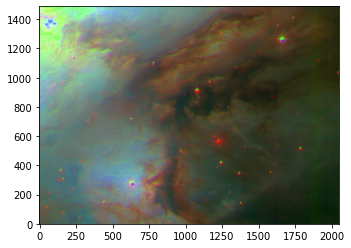

In [6]:
g = M42g[0].data
i = M42i[0].data
u = M42u[0].data



rgb_default = make_lupton_rgb(i,g, u,stretch=1.5,Q=10)



plt.imshow(rgb_default, origin='lower')
plt.savefig("rgbM42.jpg")

In [ ]:
NGC6053u = fits.open('frame-u-004646-4-0311.fits.bz2')
NGC6053i = fits.open('frame-i-004646-4-0311.fits.bz2')
NGC6053g = fits.open('frame-g-004646-4-0311.fits.bz2')

NGC6053r = fits.open('frame-r-004646-4-0311.fits.bz2')
NGC6053z = fits.open('frame-z-004646-4-0311.fits.bz2')


g = NGC6053g[0].data
i = NGC6053i[0].data
u = NGC6053u[0].data

r = NGC6053r[0].data
z = NGC6053z[0].data



rgb_default = make_lupton_rgb(i,r,g,stretch=0.5,Q=10)



plt.imshow(rgb_default, origin='lower')
plt.savefig("rgbM42.jpg")